# Analysis of LIWC data alone

In summary, best statistical differences are:

    FIELD       T AVG       B AVG       T-TEST      MW TEST     COHEN'S D
    Seeing 	    0.85481 	0.44684 	0.00020 	0.00008 	-0.64363
    Perceptual  1.11020 	0.57011 	0.00021 	0.00013 	-0.64304
    Inclusion 	1.06388 	0.58954 	0.00086 	0.00013 	-0.57210
    Cognitive 	4.24460 	2.77321 	0.00031 	0.00092 	-0.62084
    Certainty 	0.19741 	0.10791 	0.00130 	0.00107 	-0.54941

Interesting differences are:

    Past tense 	1.96276 	1.40160 	0.00409 	0.00452 	-0.47761
    Conjunctions1.53555 	1.09861 	0.00989 	0.00616 	-0.42787
    total words 24.34803 	18.81803 	0.00628 	0.00656 	-0.45385
    duration 	9.15810 	7.25421 	0.01139 	0.00713 	-0.41946
    Common Verbs3.84431 	2.98421 	0.00818 	0.01206 	-0.43895
    Negations 	0.75528 	0.58832 	0.01690 	0.01709 	-0.39547
    I 	        0.80666 	0.54548 	0.00404 	0.01782 	-0.47904

Classifiers all perform ~59% with KNN best at 60% accuracy when usign all LIWC.

Histograms show data is negative exponentially distributed.

In [67]:
datafile = '../data/liwc_data.csv' # file from Kamrul
# contains orig n151 + new n34

#-----------------
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.5f}'.format
from IPython.display import display
import matplotlib.pyplot as plt
import compare

print('...loading data')
if 'pkl' in datafile:
    df = pd.read_pickle(datafile)
else:
    df = pd.read_csv(datafile, skipinitialspace=True) 

df['duration'] = df['ans_end_time'] - df['ans_start_time']
df['total words'] = df['Word_in_dict'] + df['Word_not_in_dict']
df['y'] = df['truth_val']

# note, removed sweaar
LIWC = ['Function words','Total pronouns','Personal pronouns','I','We','You',
        'SheHe','They','Impersonal pronouns','Articles','Common Verbs',
        'Auxiliary verbs','Past tense','Present tense','Future tense',
        'Adverbs','Prepositions','Conjunctions','Negations','Quantifiers',
        'Numbers','Social','Family','Friends','Humans','Affective',
        'Positive emotion','Negative Emotion','Anxiety','Anger','Sadness',
        'Cognitive','Insight','Causation','Discrepancy','Tentativeness',
        'Certainty','Inhibition','Inclusion','Exclusion','Perceptual','Seeing',
        'Hearing','Feeling','Biological','Body','Health','Sexual','Ingestion',
        'Relativity','Motion','Space','Time','Work','Achievement','Leisure',
        'Home','Money','Religion','death@Death','Assent','Non-fluencies','Fillers']
LIWC2 = LIWC + ['duration','total words']

# to normalize by total words
#df[LIWC] = df[LIWC].values/(df['total words'].values[:,np.newaxis])
print('COLUMNS: ', df.columns, '\n')

print('n:',df.shape[0])
print('# files = ', df['root'].nunique())

df_new = df[df['root'].str.contains('2018')]
df_orig = df[~df['root'].str.contains('2018')]

print('new data count:', df_new.shape[0])
print('orig data count:', df_orig.shape[0])

display(df)


...loading data
COLUMNS:  Index(['Unnamed: 0', 'root', 'truth_val', 'question_num', 'ans_start_time',
       'ans_end_time', 'Word_in_dict', 'Word_not_in_dict', 'Function words',
       'Total pronouns', 'Personal pronouns', 'I', 'We', 'You', 'SheHe',
       'They', 'Impersonal pronouns', 'Articles', 'Common Verbs',
       'Auxiliary verbs', 'Past tense', 'Present tense', 'Future tense',
       'Adverbs', 'Prepositions', 'Conjunctions', 'Negations', 'Quantifiers',
       'Numbers', 'Swear', 'Social', 'Family', 'Friends', 'Humans',
       'Affective', 'Positive emotion', 'Negative Emotion', 'Anxiety', 'Anger',
       'Sadness', 'Cognitive', 'Insight', 'Causation', 'Discrepancy',
       'Tentativeness', 'Certainty', 'Inhibition', 'Inclusion', 'Exclusion',
       'Perceptual', 'Seeing', 'Hearing', 'Feeling', 'Biological', 'Body',
       'Health', 'Sexual', 'Ingestion', 'Relativity', 'Motion', 'Space',
       'Time', 'Work', 'Achievement', 'Leisure', 'Home', 'Money', 'Religion',
       'de

,Unnamed: 0,root,truth_val,question_num,ans_start_time,ans_end_time,Word_in_dict,Word_not_in_dict,Function words,Total pronouns,Personal pronouns,I,We,You,SheHe,They,Impersonal pronouns,Articles,Common Verbs,Auxiliary verbs,Past tense,Present tense,Future tense,Adverbs,Prepositions,Conjunctions,Negations,Quantifiers,Numbers,Swear,Social,Family,Friends,Humans,Affective,Positive emotion,Negative Emotion,Anxiety,Anger,Sadness,Cognitive,Insight,Causation,Discrepancy,Tentativeness,Certainty,Inhibition,Inclusion,Exclusion,Perceptual,Seeing,Hearing,Feeling,Biological,Body,Health,Sexual,Ingestion,Relativity,Motion,Space,Time,Work,Achievement,Leisure,Home,Money,Religion,death@Death,Assent,Non-fluencies,Fillers,duration,total words,y
0,0,2018-02-25_16-35-14-962,1,0,384.00000,396.00000,20.00000,3.00000,16.00000,4.00000,2.00000,0.00000,0.00000,0.00000,1.00000,1.00000,2.00000,2.00000,3.00000,2.00000,1.00000,2.00000,0.00000,2.00000,5.00000,1.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,2.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000,0.00000,4.00000,1.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.00000,23.00000,1
1,1,2018-02-25_16-35-14-962,1,1,402.00000,436.00000,110.00000,20.00000,76.00000,19.00000,12.00000,2.00000,0.00000,2.00000,8.00000,0.00000,7.00000,17.00000,14.00000,8.00000,6.00000,8.00000,0.00000,8.00000,15.00000,12.00000,1.00000,1.00000,0.00000,0.00000,12.00000,0.00000,0.00000,0.00000,13.00000,24.00000,0.00000,0.00000,0.00000,0.00000,17.00000,2.00000,1.00000,22.00000,7.00000,0.00000,0.00000,3.00000,6.00000,10.00000,6.00000,1.00000,3.00000,3.00000,3.00000,0.00000,0.00000,0.00000,13.00000,0.00000,13.00000,11.00000,0.00000,0.00000,2.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,12.00000,34.00000,130.00000,1
2,2,2018-02-25_16-35-14-962,1,2,446.00000,456.00000,22.00000,7.00000,17.00000,5.00000,4.00000,0.00000,0.00000,1.00000,3.00000,0.00000,1.00000,1.00000,5.00000,4.00000,0.00000,4.00000,0.00000,1.00000,3.00000,1.00000,0.00000,0.00000,3.00000,0.00000,4.00000,0.00000,0.00000,0.00000,2.00000,2.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,1.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,10.00000,29.00000,1
3,3,2018-02-25_16-35-14-962,1,3,462.00000,481.00000,23.00000,12.00000,15.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,6.00000,4.00000,2.00000,1.00000,3.00000,0.00000,3.00000,2.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,2.00000,2.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,2.00000,19.00000,35.00000,1
4,4,2018-02-25_16-35-14-962,1,4,488.00000,525.00000,78.00000,23.00000,57.00000,12.00000,5.00000,1.00000,0.00000,1.00000,1.00000,2.00000,7.00000,11.00000,15.00000,12.00000,9.00000,6.00000,0.00000,5.00000,9.00000,7.00000,2.00000,4.00000,0.00000,0.00000,5.00000,0.00000,0.00000,1.00000,6.00000,10.00000,0.00000,0.00000,0.00000,0.00000,14.00000,1.00000,0.00000,8.00000,2.00000,1.00000,0.00000,4.00000,5.00000,6.00000,5.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,7.00000,1.00000,6.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,4.00000,37.00000,101.00000,1
5,5,2018-02-25_16-35-14-962,1,5,532.00000,561.00000,71.00000,15.00000,56.00000,10.00000,4.00000,0.00000,1.00000,1.00000,2.00000,0.00000,6.00000,11.00000,13.00000,10.00000,7.00000,3.00000,0.00000,4.00000,13.00000,5.00000,2.00000,

In [69]:
# Look at the avg LIWC over all questions for T and B
g = df.groupby('truth_val')
liwc_dist = g[LIWC2].mean()
display(liwc_dist)

,Function words,Total pronouns,Personal pronouns,I,We,You,SheHe,They,Impersonal pronouns,Articles,Common Verbs,Auxiliary verbs,Past tense,Present tense,Future tense,Adverbs,Prepositions,Conjunctions,Negations,Quantifiers,Numbers,Social,Family,Friends,Humans,Affective,Positive emotion,Negative Emotion,Anxiety,Anger,Sadness,Cognitive,Insight,Causation,Discrepancy,Tentativeness,Certainty,Inhibition,Inclusion,Exclusion,Perceptual,Seeing,Hearing,Feeling,Biological,Body,Health,Sexual,Ingestion,Relativity,Motion,Space,Time,Work,Achievement,Leisure,Home,Money,Religion,death@Death,Assent,Non-fluencies,Fillers,duration,total words
truth_val,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,10.80524,2.43922,0.97649,0.51444,0.00873,0.25185,0.06917,0.13230,1.46273,1.84553,2.92411,2.19342,1.26326,1.40430,0.10141,1.25118,1.46340,1.05843,0.56884,0.35729,0.21692,0.59839,0.00134,0.00201,0.04701,1.40027,2.37408,0.04030,0.00336,0.01142,0.00269,2.67764,0.35191,0.11551,2.26729,0.74345,0.11484,0.02619,0.52921,0.72801,0.59369,0.45400,0.01813,0.04970,0.14775,0.08059,0.01612,0.00000,0.05104,1.50974,0.17461,1.08798,1.21625,0.03828,0.06111,0.07522,0.02955,0.01545,0.00336,0.00739,0.56347,0.08059,1.18670,7.14372,18.64070
1,13.61878,2.93599,1.26529,0.68563,0.00925,0.23044,0.15861,0.18137,1.67070,2.24680,3.58677,2.74253,1.76956,1.45519,0.14154,1.55405,1.95164,1.45235,0.69346,0.46586,0.28094,0.74893,0.00000,0.00000,0.04623,1.59744,2.64509,0.06472,0.00925,0.01778,0.00640,3.58108,0.44239,0.12376,2.54339,0.98222,0.17496,0.01991,0.81579,0.94452,0.85562,0.66714,0.04836,0.06970,0.26458,0.14296,0.02418,0.00213,0.09886,1.98293,0.29161,1.38762,1.35420,0.04979,0.07824,0.07895,0.03983,0.01494,0.02134,0.00427,0.65078,0.06259,1.32788,8.87127,23.14083


In [71]:
# find average LIWC for each file, then compare T to B

def compare_t_b(df_seg, fields):
    """ averages two groups over filename, then compares 
    : df_seg: the subset of df for a given segment, e.g. S2
    : filetype_t: the filetype which forms the t group, e.g. I-T or W-T
    : filetype_b: the filetype which forms the b group, e.g. I-B or W-B
    """
    gt = df_seg[(df_seg['truth_val'] == 1)].groupby('root')
    gb = df_seg[(df_seg['truth_val'] == 0)].groupby('root')
    gt_dist = gt[fields].mean()
    gb_dist = gb[fields].mean()

    statss = []
    for field in fields:
        #mw_stat, mw_p = mannwhitneyu(gwt_dist[c],gwb_dist[c],alternative='two-sided')
        #mw_stat, mw_p = mannwhitneyu(gwb_dist[c],gwt_dist[c],use_continuity=False)
        comp = compare.Compare(gt_dist[field],gb_dist[field])
        statss.append(np.array(comp.calc_stats()))
        #a_mean,b_mean,tt_p,mw_p2,coh_d = stats
    #df_cluster_dist_w = pd.DataFrame(np.vstack((cluster_names,statss[0],statss[1],statss[2],statss[3],statss[4])).T)
    df_cluster_dist = pd.DataFrame(np.array(statss))
    df_cluster_dist.columns=['T mean','B mean','tt p-val','MW p-val','d']
    df_cluster_dist.index = fields
    print('T vs B')
    return df_cluster_dist
    
def do_compare(df_seg, fields):
    compare_t_b(df_seg, fields)

#---------------------------------------------
# comparison of T and B for different segments

print('old data')
#df_orig = df[df['root'].apply(lambda x: '2018' not in x)]
df_comp_orig = compare_t_b(df_orig, LIWC2).sort_values(by=['MW p-val'])
display(df_comp_orig)

'''
print('new data')
#df_new = df[df['root'].apply(lambda x: '2018' in x)]
df_comp_new = compare_t_b(df_new, LIWC2).sort_values(by=['MW p-val'])
display(df_comp_new)

print('all data')
#df_new = df[df['root'].apply(lambda x: '2018' in x)]
df_comp_all = compare_t_b(df, LIWC2).sort_values(by=['MW p-val'])
display(df_comp_all)
'''


old data
T vs B


,T mean,B mean,tt p-val,MW p-val,d
Inclusion,0.85536,0.54120,0.00050,0.00010,-0.58375
Seeing,0.69724,0.43392,0.00023,0.00030,-0.61901
Perceptual,0.91327,0.55539,0.00031,0.00036,-0.60602
Certainty,0.17540,0.10061,0.00131,0.00095,-0.53675
Cognitive,3.75167,2.66912,0.00138,0.00345,-0.53435
Quantifiers,0.49709,0.32801,0.00298,0.00354,-0.49455
Exclusion,0.95322,0.67962,0.00674,0.00362,-0.44986
Past tense,1.96276,1.40160,0.00409,0.00452,-0.47761
Auxiliary verbs,2.93804,2.22187,0.00315,0.00551,-0.49179
Function words,14.39965,10.87539,0.00397,0.00584,-0.47926


"\nprint('new data')\n#df_new = df[df['root'].apply(lambda x: '2018' in x)]\ndf_comp_new = compare_t_b(df_new, LIWC2).sort_values(by=['MW p-val'])\ndisplay(df_comp_new)\n\nprint('all data')\n#df_new = df[df['root'].apply(lambda x: '2018' in x)]\ndf_comp_all = compare_t_b(df, LIWC2).sort_values(by=['MW p-val'])\ndisplay(df_comp_all)\n"

## Correlations

## Histograms

0.16027633851468048


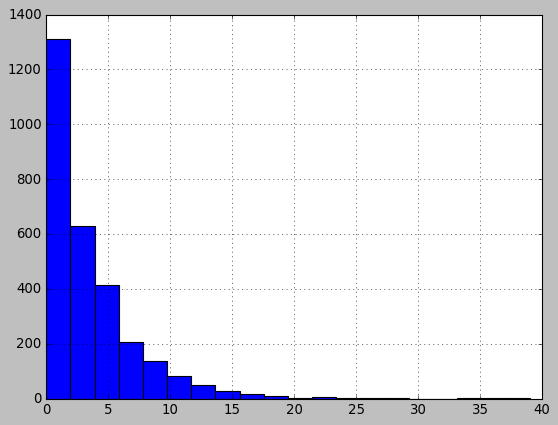

In [59]:
plt.style.use('classic')
print(df[df['Positive emotion'] > 5].shape[0]/df.shape[0])
df['Cognitive'].hist(bins=20)

## Classification

In [64]:
import ml_core
# orig data only
df_orig_avg = df_orig.groupby('root').mean()
print('# files:',df_orig_avg.shape[0])

usecols = ['y'] + LIWC2
print('CLASSIFICATION PERFORMANCE WITH OLD DATA n151')
ml_core.ml(df_orig_avg[usecols])

# files: 151

MODEL:  KNN
fold: 0  best c: 50  dev:0.67  dev_ones:0.48 test:0.56  train:0.60
fold: 1  best c: 35  dev:0.76  dev_ones:0.52 test:0.69  train:0.59
fold: 2  best c: 50  dev:0.64  dev_ones:0.52 test:0.75  train:0.59
fold: 3  best c: 35  dev:0.70  dev_ones:0.48 test:0.75  train:0.56
fold: 4  best c: 30  dev:0.73  dev_ones:0.52 test:0.38  train:0.63
fold: 5  best c: 25  dev:0.68  dev_ones:0.50 test:0.60  train:0.60
fold: 6  best c: 25  dev:0.71  dev_ones:0.50 test:0.64  train:0.62
fold: 7  best c: 35  dev:0.62  dev_ones:0.53 test:0.50  train:0.61
fold: 8  best c: 40  dev:0.65  dev_ones:0.50 test:0.79  train:0.58
fold: 9  best c: 25  dev:0.68  dev_ones:0.47 test:0.36  train:0.61
Avg test acc:0.601 Avg train acc:0.598

MODEL:  LOGISTIC
fold: 0  best c: 30  dev:0.70  dev_ones:0.52 test:0.62  train:0.87
fold: 1  best c: 1  dev:0.70  dev_ones:0.52 test:0.56  train:0.77
fold: 2  best c: 1  dev:0.73  dev_ones:0.48 test:0.56  train:0.75
fold: 3  best c: 1  dev:0.70  dev_ones:0.52 test